# 과적합 방지 전략

## 1. 데이터 로드

In [3]:
import tensorflow as tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

vocab_size = 1000
imdb = keras.datasets.imdb
(train_datas, train_labels), (test_datas, test_labels) = imdb.load_data(num_words = vocab_size)

2025-10-16 01:46:34.174173: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 01:46:34.259362: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist

## 2. 멀티 핫 시퀀싱

In [4]:
def multi_hot_sequences(sequence, dimension):
    results = np.zeros((len(sequence), dimension))
    for i,word_indices in enumerate(sequence):
        results[i,word_indices] = 1.0
    return results

train_datas = multi_hot_sequences(train_datas, dimension=vocab_size)
test_datas = multi_hot_sequences(test_datas, dimension=vocab_size)

In [5]:
train_labels = np.reshape(train_labels, (-1,1))
test_labels = np.reshape(test_labels, (-1,1))

## 3. 모델 정의

In [17]:
baseline_model = keras.Sequential([
	keras.layers.Dense(16, activation="relu", input_shape=(vocab_size,)),
 	keras.layers.Dense(16, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

baseline_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

baseline_model.summary()

bigger_model = keras.Sequential([
    keras.Input(shape=(vocab_size,)),
	keras.layers.Dense(512, activation="relu"),
 	keras.layers.Dense(512, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

bigger_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

bigger_model.summary()

smaller_model = keras.Sequential([
    keras.Input(shape=(vocab_size,)),
	keras.layers.Dense(4, activation="relu"),
 	keras.layers.Dense(4, activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

smaller_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

smaller_model.summary()

# l2 규제 추가 모델
l2_model = keras.Sequential([
	keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu", input_shape=(vocab_size,)),
 	keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
 	keras.layers.Dense(1, activation="sigmoid")
])

l2_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

l2_model.summary()

dpt_model = keras.Sequential([
	keras.layers.Dense(16, activation="relu", input_shape=(vocab_size,)),
 	keras.layers.Dropout(0.5),
 	keras.layers.Dense(16, activation="relu"),
  	keras.layers.Dropout(0.5),
 	keras.layers.Dense(1, activation="sigmoid")
])

dpt_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

dpt_model.summary()

l2_dpt_model = keras.Sequential([
	keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu", input_shape=(vocab_size,)),
 	keras.layers.Dropout(0.5),
 	keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
  	keras.layers.Dropout(0.5),
 	keras.layers.Dense(1, activation="sigmoid")
])

l2_dpt_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy","binary_crossentropy"])

l2_dpt_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,681 (2.96 MB)

 Trainable params: 775,681 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 4)              │         4,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,029 (15.74 KB)

 Trainable params: 4,029 (15.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 학습

In [18]:
baseline_history = baseline_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

bigger_history = bigger_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

smaller_history = smaller_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

l2_history = l2_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

dpt_history = dpt_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

l2_dpt_history = l2_dpt_model.fit(train_datas,
                                      train_labels, 
                                      epochs=100,
                                      batch_size=512,
                                      validation_data=(test_datas,test_labels))

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7173 - binary_crossentropy: 0.5516 - loss: 0.5516 - val_accuracy: 0.8273 - val_binary_crossentropy: 0.4030 - val_loss: 0.4030
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8512 - binary_crossentropy: 0.3521 - loss: 0.3521 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3393 - val_loss: 0.3393
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8690 - binary_crossentropy: 0.3164 - loss: 0.3164 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3310 - val_loss: 0.3310
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8739 - binary_crossentropy: 0.3034 - loss: 0.3034 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3353 - val_loss: 0.3353
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8788 - binary_crossentropy: 0.2967 - loss: 0.2967 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3295 - val_loss: 0.3295
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

## 5. 결과 그래프 출력

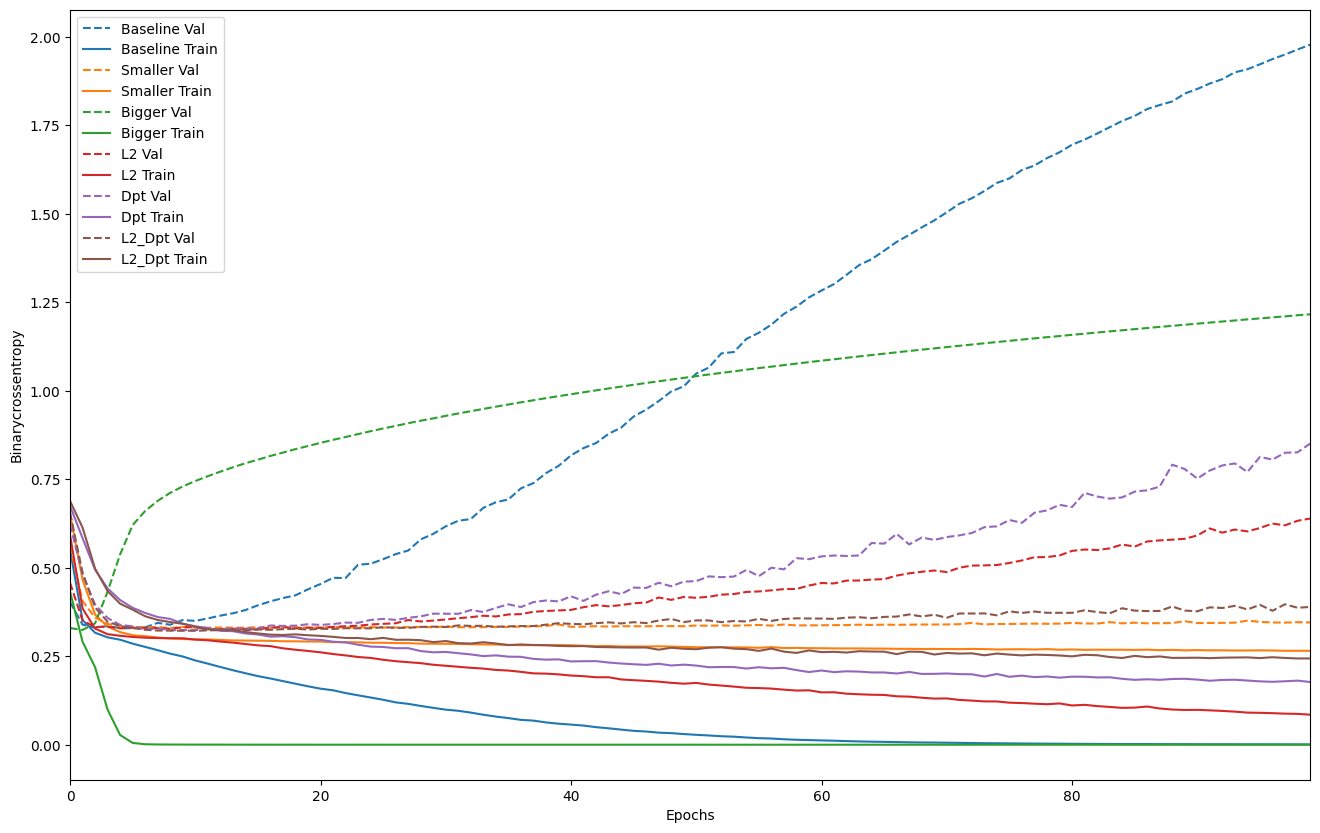

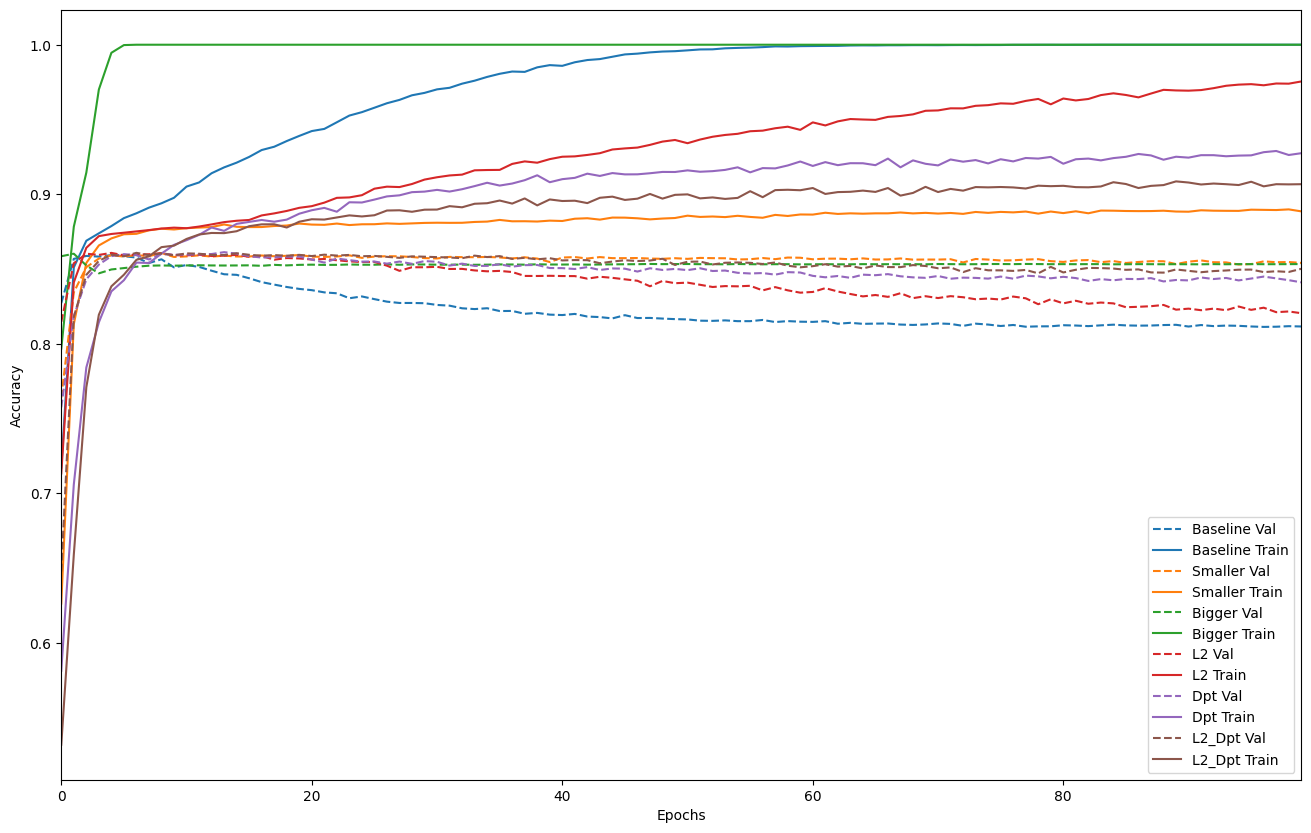

In [20]:
def plot_history(histories, key="binary_crossentropy"):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+" Val")
        plt.plot(history.epoch, history.history[key],
                       color=val[0].get_color(),
                       label=name.title()+ " Train")
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_','').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.show()
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history),
             ('l2', l2_history),
             ('dpt', dpt_history),
             ('l2_dpt', l2_dpt_history)
            ])   
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history),
             ('l2', l2_history),
             ('dpt', dpt_history),
             ('l2_dpt', l2_dpt_history)
            ], key="accuracy")     